<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/read_write_spatial_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read/Write Spatial Data

In this exercise, you will learn how to read and write the following types of spatial data with R.

-   [Vector data](#vector-data)

    -   [Polygon data](#polygons)

    -   [Points Vector](#points-vector)

    -   [Lines or Polylines](#lines-or-polylines)

-   [Raster data](#raster-data)

    -   [Single band raster](#single-band-raster)

    -   [Multi-bands raster](#multi-bands-raster)

### Vector Data {#vector-data}

Vector data is a type of geospatial data representation used in Geographic Information Systems (GIS) and computer graphics. It represents spatial information using points, lines, and polygons, which are defined by their geometric coordinates. These coordinates consist of x and y (and sometimes z) values that describe the location of each point, the vertices of lines, or the corners of polygons.

Here's a breakdown of the main elements of vector data:

1.  **Points**: A single data point that represents a specific location in space, defined by its x and y coordinates (and potentially z for 3D data). Points are often used to represent features like cities, landmarks, or sampling locations.

2.  **Lines (Polylines)**: A series of connected points, which can be straight or curved, used to represent linear features such as roads, rivers, or boundaries. Lines are composed of multiple vertices that define their shape.

3.  **Polygons**: Closed shapes formed by connecting a series of lines to enclose an area. Polygons are used to represent features like countries, lakes, forests, and other spatially bounded regions.

Vector data provides a more detailed and accurate representation of geographic features compared to raster data, which is another common data format used in GIS. One of the significant advantages of vector data is that it allows for precise measurements, editing, and analysis of geographic features. It is also more scalable and efficient for storing data with well-defined boundaries and discrete features.

Some common vector data formats include Shapefile (.shp), GeoJSON (.geojson), and Keyhole Markup Language (.kml). These formats can store various attributes along with the spatial coordinates, making it possible to attach additional information (e.g., population data for cities or elevation data for terrain) to each feature represented in the vector dataset.

The **shapefile**, a interchangeably data format which are regulated by [ESRI](https://www.esri.com/en-us/home). It is one of the most common form of geospatial vector data used in GIS software and analyses. Three unique files are required for a shapefile, including: **.shx** (shape index format; this tags the shapefile with a position, so users can move it forward and backward among layers, a **.shp** (shape format, which stores geometric data, and a **.dbf** (attribute format file; which holds attributes (information) for the shapes in the file).




## R Packages for spatial Read and Write

### sf

The "sf" package provides a consistent and efficient set of tools for handling spatial data, including reading, writing, manipulating, and visualizing spatial data. It also supports various spatial operations and is compatible with many other R packages that deal with spatial data.

Some of the key functionalities of the "sf" package include:

1.  Reading and Writing: Loading and saving spatial data in various formats, such as shapefiles, GeoJSON, and spatial databases.

2.  Data Manipulation: Working with spatial data alongside traditional data frames, allowing for easy filtering, subsetting, and merging of data.

3.  Spatial Operations: Performing geometric operations like intersections, unions, and buffering on spatial data.

4.  Visualization: Creating maps and visualizing spatial data using functions that work well with ggplot2.

5.  Coordinate Transformation: Converting spatial data between different coordinate reference systems (CRS) and projecting data onto different map projections.

> install.packages('sf')

### rgdal

In the context of R, "rgdal" is a package that provides bindings to the Geospatial Data Abstraction Library (GDAL) for reading, writing, and manipulating geospatial raster and vector data formats. GDAL is a powerful open-source library that supports a wide range of geospatial data formats commonly used in the GIS (Geographic Information Systems) and remote sensing domains.

The "rgdal" package allows R users to work with spatial data in various formats, including but not limited to shapefiles, GeoTIFFs, NetCDF, and more. It enables data import, export, and transformation between different coordinate reference systems (CRS). The package also facilitates the extraction of geospatial information, such as spatial extents and coordinate information.

Important functions and features provided by "rgdal" include:

1.  Data Import and Export: Reading and writing geospatial data to and from various formats using functions like **`readOGR`**, **`writeOGR`**, **`readGDAL`**, **`writeGDAL`**, etc.

2.  Coordinate Transformation: Converting data between different CRS using **`spTransform`** and **`project`**.

3.  Spatial Subsetting: Subsetting and clipping spatial data based on bounding boxes or other spatial objects.

4.  Data Information: Extracting metadata and other geospatial information from datasets.

To use the "rgdal" package in R, you need to install it along with its dependencies. However, it's important to note that installing the "rgdal" package can be tricky due to the system-level dependencies required by GDAL. Depending on your operating system (Windows, macOS, or Linux), you might need to install additional libraries or packages before successfully installing "rgdal."

> install.packages('rgdal')

### raster

the "raster" package is an important R package used for working with raster data, which represents data in grid format (e.g., satellite images, digital elevation models, climate data) rather than vector format (e.g., points, lines, polygons). The package provides a wide range of functionalities for reading, writing, manipulating, and analyzing raster datasets.

The "raster" package is built on top of the "sp" and "rgdal" packages, making it easy to integrate raster data with spatial data. It offers efficient and memory-friendly methods for handling large raster datasets and supports various raster file formats, including GeoTIFF, NetCDF, and more.

Some of the key functionalities of the "raster" package include:

1.  Data Import and Export: Reading and writing raster data from and to various file formats using functions like **`raster()`**, **`brick()`**, **`writeRaster()`**, and more.

2.  Data Manipulation: Resampling, cropping, masking, and reprojecting raster data.

3.  Mathematical Operations: Performing mathematical operations on raster data, such as map algebra, cell statistics, and overlay operations.

4.  Zonal Statistics: Calculating statistics (e.g., mean, sum, max) within defined zones or polygons.

5.  Visualization: Creating various types of plots and visualizations for raster data.

6.  Time Series Analysis: Handling and analyzing raster time series data.

> install.packages('raster')

### Install Packages

In [3]:
install.packages(c("sf", 'raster'))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘Rcpp’, ‘classInt’, ‘s2’, ‘units’, ‘sp’, ‘terra’




### Load library

In [4]:
library(sf)       # spatial vector data
library (raster) 	# raster and vector data read & write

Linking to GEOS 3.10.2, GDAL 3.4.3, PROJ 8.2.1; sf_use_s2() is TRUE

Loading required package: sp

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)



## Vector Data {#vector-data}

Vector data is a type of geospatial data representation used in Geographic Information Systems (GIS) and computer graphics. It represents spatial information using points, lines, and polygons, which are defined by their geometric coordinates. These coordinates consist of x and y (and sometimes z) values that describe the location of each point, the vertices of lines, or the corners of polygons.

Here's a breakdown of the main elements of vector data:

Points: A single data point that represents a specific location in space, defined by its x and y coordinates (and potentially z for 3D data). Points are often used to represent features like cities, landmarks, or sampling locations.

Lines (Polylines): A series of connected points, which can be straight or curved, used to represent linear features such as roads, rivers, or boundaries. Lines are composed of multiple vertices that define their shape.

Polygons: Closed shapes formed by connecting a series of lines to enclose an area. Polygons are used to represent features like countries, lakes, forests, and other spatially bounded regions.

Vector data provides a more detailed and accurate representation of geographic features compared to raster data, which is another common data format used in GIS. One of the significant advantages of vector data is that it allows for precise measurements, editing, and analysis of geographic features. It is also more scalable and efficient for storing data with well-defined boundaries and discrete features.

Some common vector data formats include Shapefile (.shp), GeoJSON (.geojson), and Keyhole Markup Language (.kml). These formats can store various attributes along with the spatial coordinates, making it possible to attach additional information (e.g., population data for cities or elevation data for terrain) to each feature represented in the vector dataset.

The shapefile, a interchangeably data format which are regulated by ESRI. It is one of the most common form of geospatial vector data used in GIS software and analyses. Three unique files are required for a shapefile, including: .shx (shape index format; this tags the shapefile with a position, so users can move it forward and backward among layers, a .shp (shape format, which stores geometric data, and a .dbf (attribute format file; which holds attributes (information) for the shapes in the file).

### Spatial Poylgons

Polygons are two-dimensional geographical features covering a portion of the earth’s surface, for example, forests, lakes, administrative boundaries, farmers’ fields, or any other organizational unit the user defines. Polygons are important because their area and perimeter can be measured.

#### Read polygons

Before reading the data from a local drive, you need to define a working directory from where you want to read or to write data. We will use **setwd()** function to create a working directory. Or we can define a path for data outside of our working directory from where we can read files. In this case, we will use **paste0(data path, "file name")**

For reading ESRI shape file, we can use either **readOGR()** or **shapefile** of **rgdal** or **raster** packages, respectively.

In [ ]:
# Define data folder
#dataFolder<-"E:\\Dropbox\\GitHub\\Data\\Bangladesh\\"
# if data in working directory
#poly.GCS<-rgdal::readOGR(paste0(dataFolder, "/Shapefiles/raj_district_GCS.shp"))
#poly.GCS<-shapefile(paste0(dataFolder, "/Shapefiles/bd_district_GCS.shp"))
#print(proj4string(poly.GCS))

We use **st_read()** from sf package read simple features or layers from from github using "vsicurl"

In [5]:
library(sf)
# define file from my github
poly.GCS.st = st_read("/vsicurl/https://github.com//zia207/r-colab/raw/main/Data/Bangladesh//Shapefiles/raj_district_GCS.shp")

Reading layer `raj_district_GCS' from data source 
  `/vsicurl/https://github.com//zia207/r-colab/raw/main/Data/Bangladesh//Shapefiles/raj_district_GCS.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 8 features and 14 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 88.00863 ymin: 23.80807 xmax: 89.82498 ymax: 25.27759
Geodetic CRS:  WGS 84


Check projection: st_crs retrieve coordinate reference system from sf or sfc object

In [6]:
print(st_crs(poly.GCS.st))

Coordinate Reference System:
  User input: WGS 84 
  wkt:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["latitude",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["longitude",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4326]]


We plot st object using polt() function:

Warning message:
“plotting the first 9 out of 14 attributes; use max.plot = 14 to plot all”


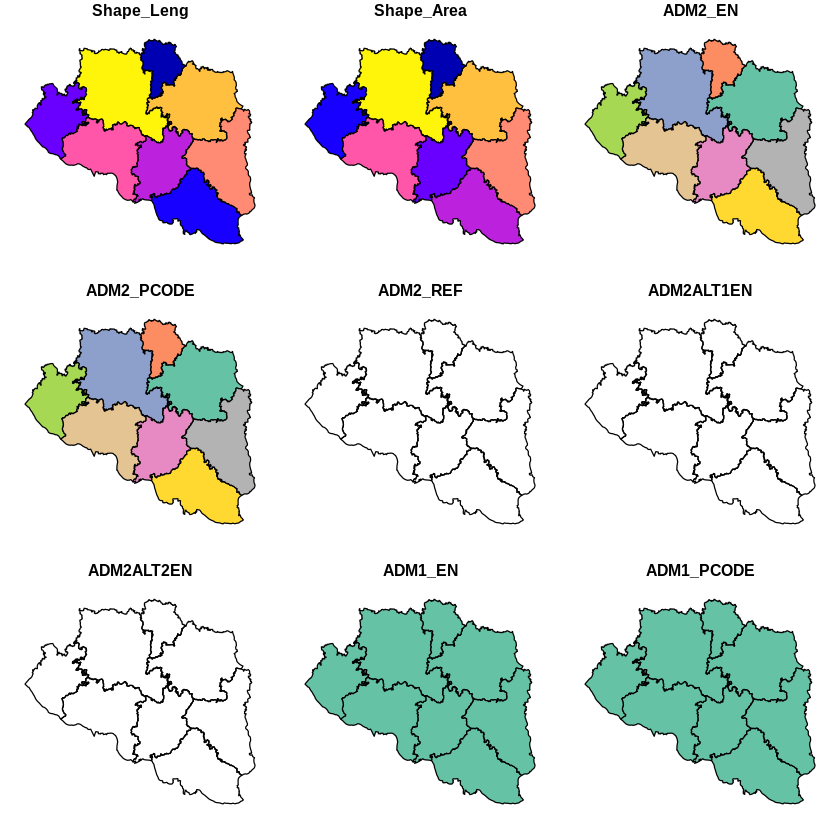

In [7]:
plot(poly.GCS.st)

We can only plot single layer (geometry)

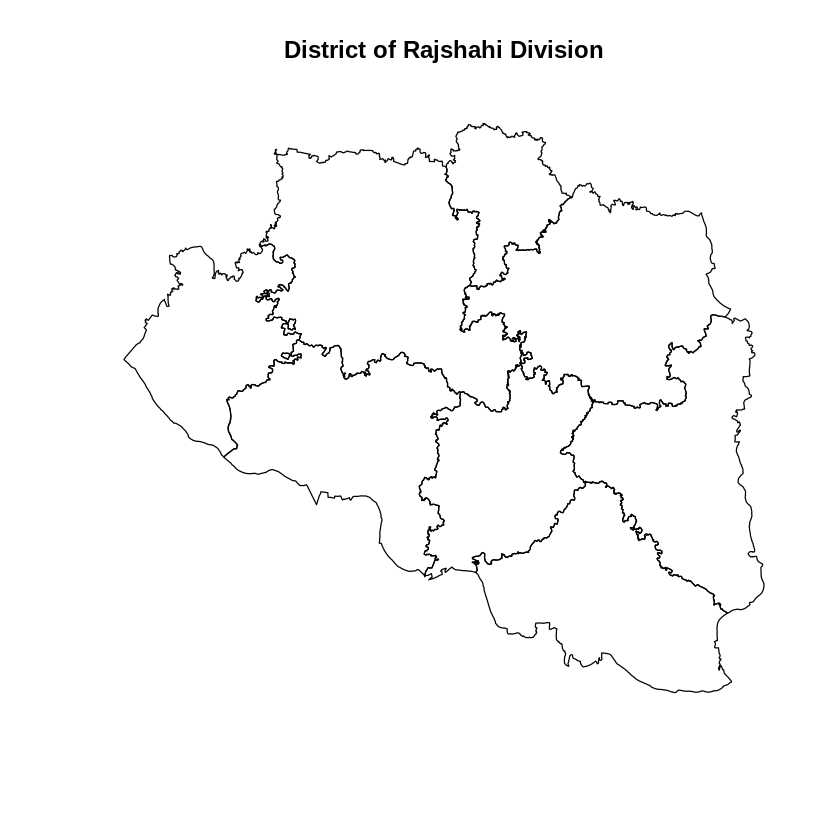

In [8]:
plot(poly.GCS.st$geometry, main="District of Rajshahi Division")

#### Write  spatial polygons

We you can use st_write() to write st objects as shape files

In [ ]:
poly.GCS.sp <- sf:::as_Spatial(poly.GCS.st$geom) # This works
shapefile(poly.GCS.sp, "raj_district_GCS_01.shp", overwrite=TRUE)

We can also use **shapefile** function of raster package to write the vector data. but before you have to  convert st objects to Spatial Polygon dataframe.

In [9]:
st_write(poly.GCS.st, "raj_district_GCS_01.shp", append=FALSE)

Writing layer `raj_district_GCS_01' to data source 
  `raj_district_GCS_01.shp' using driver `ESRI Shapefile'
Writing 8 features with 14 fields and geometry type Polygon.


### Spatial Point data

Zero-dimensional points are important for geographical features like wells, soil-sampling locations that can be best expressed by a single reference point. Often point vector data consist off several points into a multi-point structure, with a single attribute record. For example, all the soil sampling points could be considered as a single geometry. The main drawback of a point feature, however, are that they cannot be used to make measurements (as you can with a polygon).

We used around 5,000 soil samples Rajshahi Division. These samples were collected by the SRDI. We will use **shapefile()**  or **st_read()** to read this vector data.

#### Read  Point data

In [ ]:
# # Reading point shape file
#point.GCS<-shapefile(paste0(dataFolder,"/Shapefiles/raj_soil_data_GCS.shp"))   # with raster
#print(proj4string(point.GCS))

In [10]:
library(sf)
# define file from my github
point.GCS.st = st_read("/vsicurl/https://github.com//zia207/r-colab/raw/main/Data/Bangladesh//Shapefiles/raj_soil_data_GCS.shp")

Reading layer `raj_soil_data_GCS' from data source 
  `/vsicurl/https://github.com//zia207/r-colab/raw/main/Data/Bangladesh//Shapefiles/raj_soil_data_GCS.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 5796 features and 34 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: 88.05378 ymin: 23.8279 xmax: 89.81412 ymax: 25.26618
Geodetic CRS:  WGS 84


Warning message:
“plotting the first 9 out of 34 attributes; use max.plot = 34 to plot all”


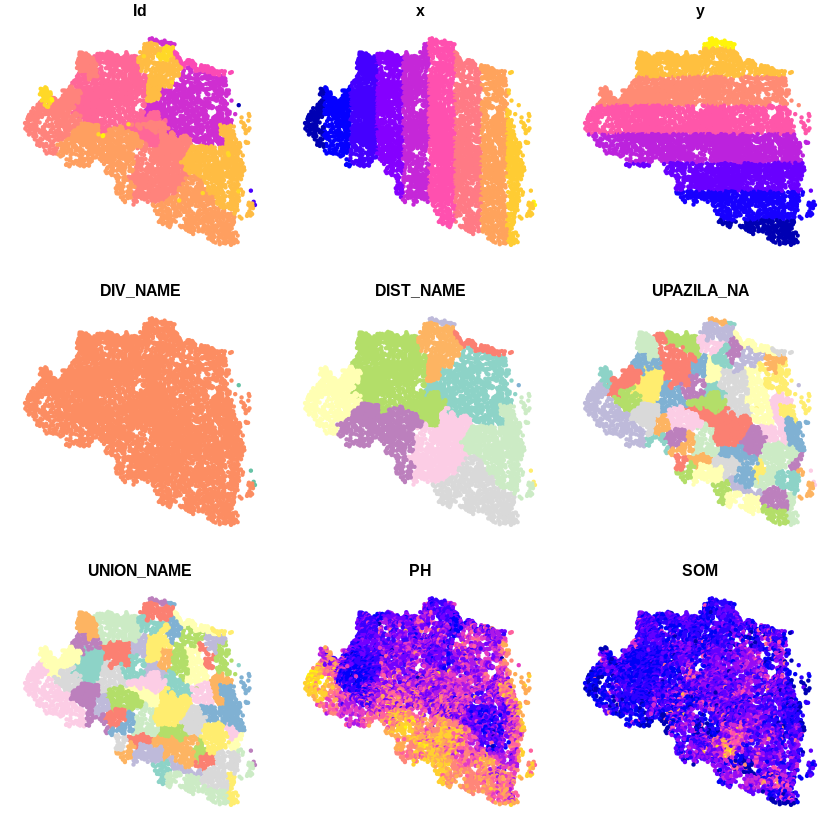

In [12]:
plot(point.GCS.st,
     main= "Point Vector map",
     pch=20,   # symbol type
     cex=0.8)  # symbol size

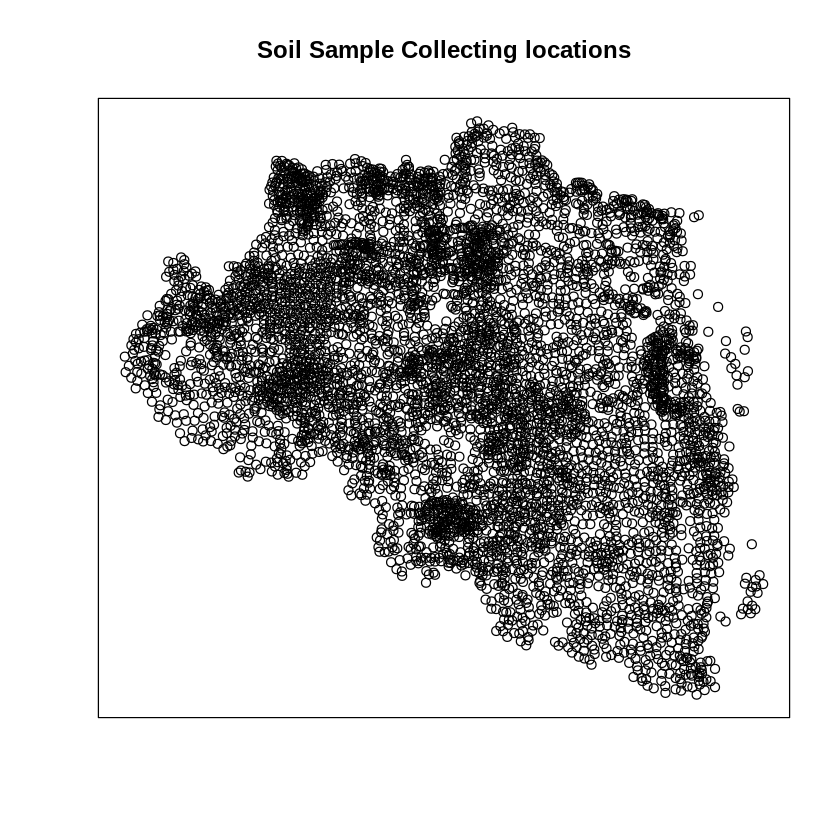

In [17]:
plot(point.GCS.st$geometry, main="Soil Sample Collecting locations")
box()

### Lines or Polylines {#lines-or-polylines}

One-dimensional lines, also called polylines, are used to represent geographical features like rivers, roads, railroads, trails, and topographic lines. Note that these features are linear in nature and do not have area like polygons. Hence, they can measure distance.

In [ ]:
#line.GCS<-shapefile(paste0(dataFolder,"/Shapefiles/raj_road_GCS.shp"))      # with raster
#print(proj4string(line.GCS))

In [15]:
library(sf)
# define file from my github
lines.GCS.st = st_read("/vsicurl/https://github.com//zia207/r-colab/raw/main/Data/Bangladesh//Shapefiles/raj_road_GCS.shp")

Reading layer `raj_road_GCS' from data source 
  `/vsicurl/https://github.com//zia207/r-colab/raw/main/Data/Bangladesh//Shapefiles/raj_road_GCS.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 1596 features and 7 fields
Geometry type: MULTILINESTRING
Dimension:     XY
Bounding box:  xmin: 88.10178 ymin: 23.83185 xmax: 89.80968 ymax: 25.2748
Geodetic CRS:  WGS 84


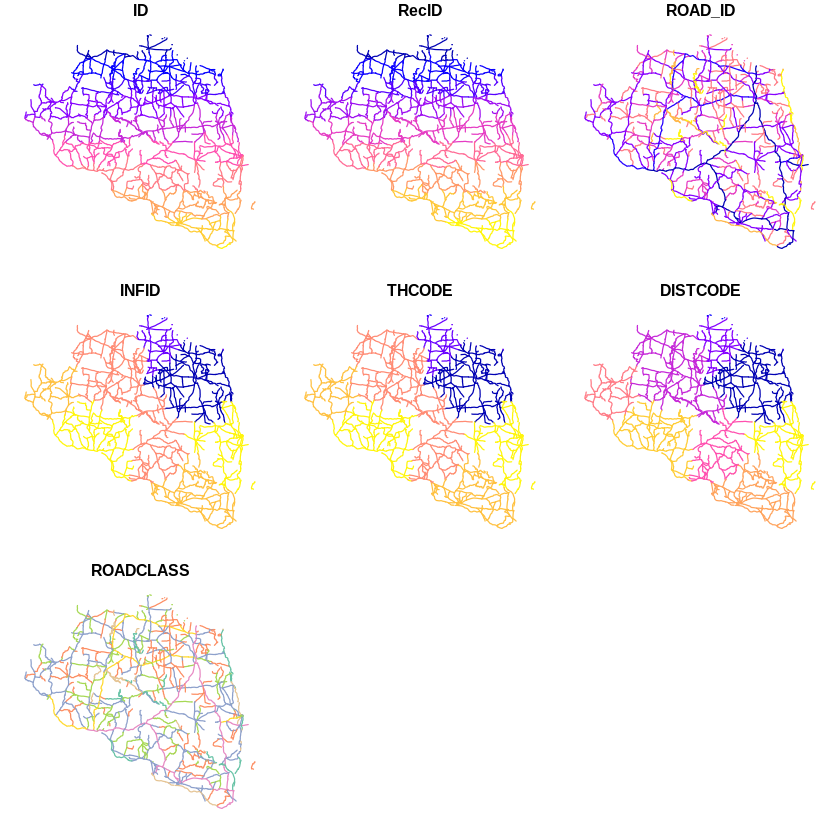

In [16]:
plot(lines.GCS.st)

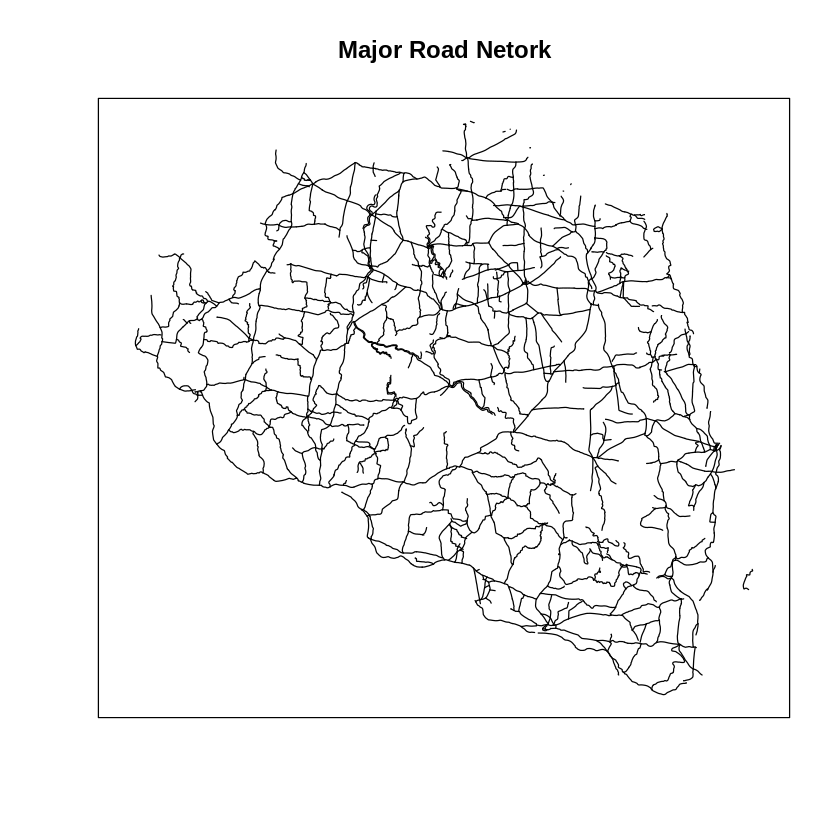

In [18]:
plot(lines.GCS.st$geometry, main="Major Road Netork")
box()

## Raster data

Raster data is another type of geospatial data representation used in Geographic Information Systems (GIS) and various other applications. Unlike vector data, which uses points, lines, and polygons to represent spatial information, raster data organizes information in a grid-like structure, with each cell or pixel containing a value that represents a specific attribute or measurement at a particular location.

Key characteristics of raster data include:

1.  **Pixel-based representation**: Raster data divides the geographic area into a regular grid of pixels, where each pixel corresponds to a specific location on the Earth's surface. Each pixel stores a value representing a particular attribute, such as elevation, temperature, land use, satellite imagery, or any other continuous data.

2.  **Resolution**: The resolution of raster data refers to the size of each pixel, which determines the level of detail in the data. Higher resolution means smaller pixel sizes and more detail, while lower resolution means larger pixel sizes and less detail.

3.  **Cell values**: The cell values in raster data can represent a wide range of information, such as elevation above sea level, temperature readings, land cover categories, or satellite sensor measurements.

4.  **Coverage and extent**: Raster datasets have a defined coverage area and extent, meaning they represent a specific geographic region with boundaries.

Common examples of raster data include digital elevation models (DEMs) used for terrain representation, satellite imagery, aerial photographs, climate data, and remotely sensed data from various sensors.

Raster data has several advantages, including its ability to efficiently store and process large continuous datasets and perform spatial analysis like interpolation, proximity analysis, and slope calculations. However, it may not be as accurate or suitable for representing discrete features with well-defined boundaries compared to vector data.

Raster data formats often include GeoTIFF (.tif), JPEG (.jpg), PNG (.png), and many other specialized formats depending on the type of data being represented and the intended use.

Unlike vector data, a raster data consists of cells or pixels organized into rows and columns as a matrix where each cell contains a value representing geographical feature on the earth. The size of the area on the surface that each pixel covers is known as the spatial resolution of the image. For instance, an image that has a 1 m spatial resolution means that each pixel in the image represents a 1 m x 1 m area. There are two types of raster data: continuous and discrete. An example of discrete raster data is Land use raster. Data types are flexible, including discrete and categorical data, such as soil or land-use maps, or continuous data as in digital elevation models, precipitation gradient maps, or pollutant concentration maps, etc.

Generally, two types of raster use in GIS and remote sensing application: **a single band**, or layer measure of a single characteristic of spatial area and **multiple bands** raster contains multiple spatially corresponding matrices of cell values representing the same spatial area. An example of a single-band raster data set is a digital elevation model (DEM). Each cell in a DEM contains only one value representing elevation of earth surface. Most satellite imagery has multiple bands, typically containing values within band of the electromagnetic spectrum.

In this exercise, we will use SRTM 90 Digital Elevation Model of Rajshahi Division which was downloaded from [CGIAR-CSI](http://www.cgiar-csi.org/data/srtm-90m-digital-elevation-database-v4-1).